In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Parameters Vector

Load, merge, normalization vector of parameters.

In [2]:
# Loading each csv file
df1 = pd.read_csv('fh1_5.csv')
df2 = pd.read_csv('fp1_5.csv')

Concatenating all four DataFrames into one.

In [26]:
allpatients = pd.concat([df1,df2])
allpatients.head()

,MAX,MIN,RMS,Status
0,5244.600000,-6704.32,3293.267478,zdrowy
1,17412.320000,-19319.40,8659.942754,zdrowy
2,11314.583333,-9073.00,5133.885510,zdrowy
3,7929.760000,-7181.92,3212.765774,zdrowy
4,9046.680000,-8226.76,4747.242645,zdrowy


/home/barti/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


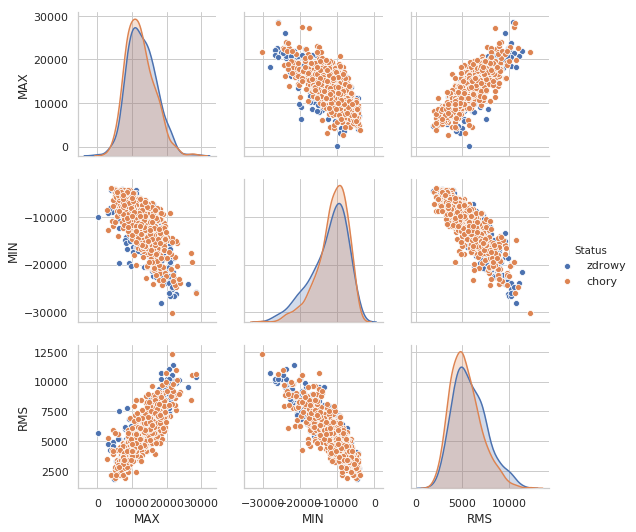

In [27]:
sns.pairplot(allpatients, hue = 'Status')

Features has diffrent rows, so they have to be normalized.

Text(0,0.5,'Liczność')

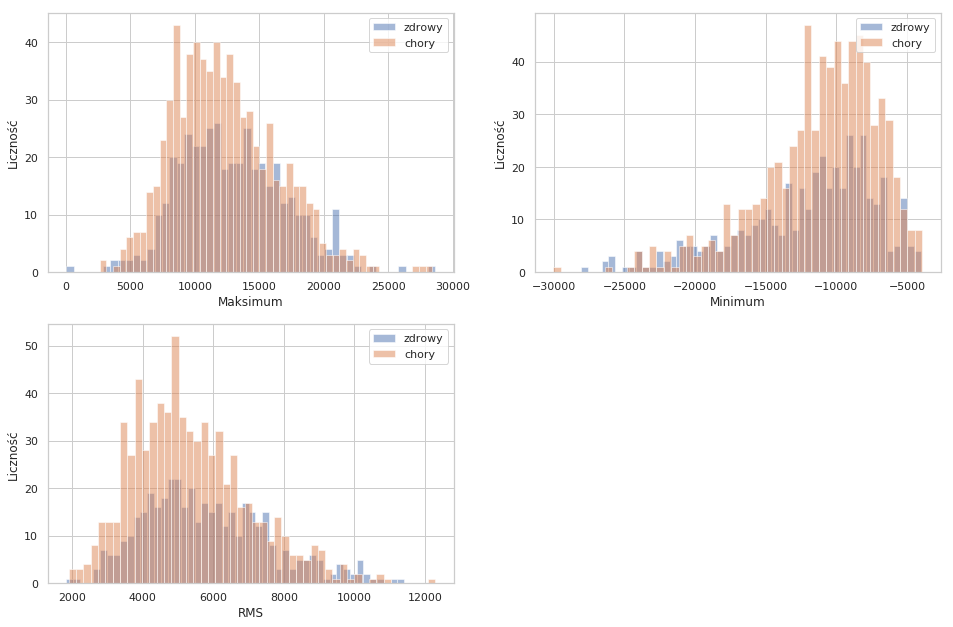

In [4]:
bins = 50
fig = plt.figure()
fig.set_size_inches(16, 10.5)
plt.subplot(2,2,1)
plt.hist(allpatients[allpatients['Status']=='zdrowy']['MAX'], bins, alpha=0.5, label='zdrowy')
plt.hist(allpatients[allpatients['Status']=='chory']['MAX'], bins, alpha=0.5, label='chory')
plt.legend(loc='upper right')
plt.xlabel('Maksimum')
plt.ylabel('Liczność')
plt.subplot(2,2,2)
plt.hist(allpatients[allpatients['Status']=='zdrowy']['MIN'], bins, alpha=0.5, label='zdrowy')
plt.hist(allpatients[allpatients['Status']=='chory']['MIN'], bins, alpha=0.5, label='chory')
plt.legend(loc='upper right')
plt.xlabel('Minimum')
plt.ylabel('Liczność')
plt.subplot(2,2,3)
plt.hist(allpatients[allpatients['Status']=='zdrowy']['RMS'], bins, alpha=0.5, label='zdrowy')
plt.hist(allpatients[allpatients['Status']=='chory']['RMS'], bins, alpha=0.5, label='chory')
plt.legend(loc='upper right')
plt.xlabel('RMS')
plt.ylabel('Liczność')

Text(0,0.5,'MIN')

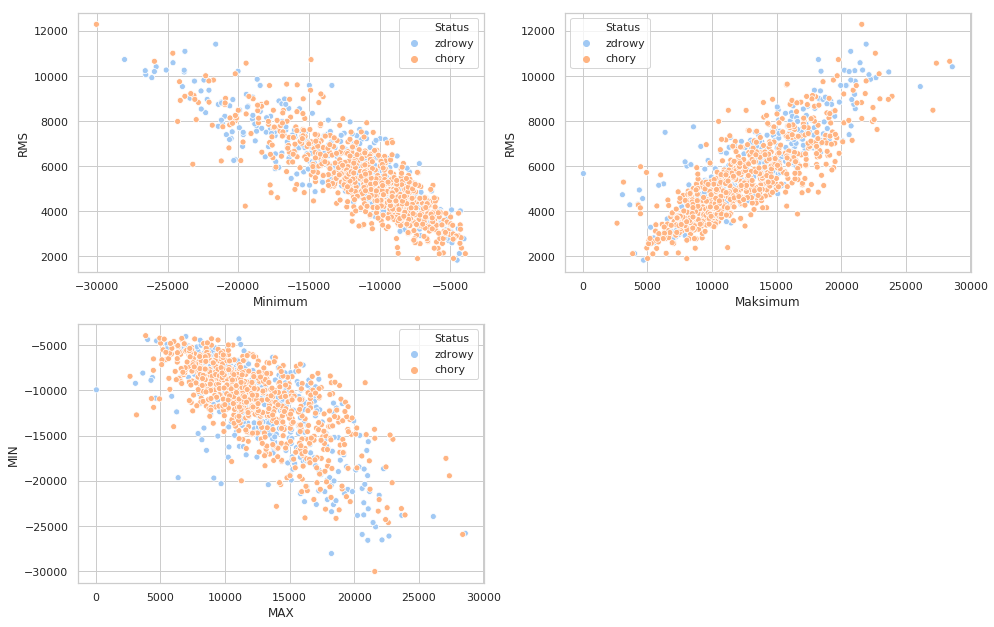

In [5]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
plt.subplot(2,2,1)
sns.scatterplot(x=allpatients['MIN'],y=allpatients['RMS'],hue=allpatients['Status'],palette='pastel')
plt.xlabel('Minimum')
plt.ylabel('RMS')
plt.subplot(2,2,2)
sns.scatterplot(x=allpatients['MAX'],y=allpatients['RMS'],hue=allpatients['Status'],palette='pastel')
plt.xlabel('Maksimum')
plt.ylabel('RMS')
plt.subplot(2,2,3)
sns.scatterplot(x=allpatients['MAX'],y=allpatients['MIN'],hue=allpatients['Status'],palette='pastel')
plt.xlabel('MAX')
plt.ylabel('MIN')

In [6]:
features = ['MAX','MIN','RMS']
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MAX,MIN,RMS,Status
0,-1.800271,1.077602,-1.299194,zdrowy
1,1.198165,-1.756069,1.806672,zdrowy
2,-0.304472,0.545536,-0.233970,zdrowy
3,-1.138579,0.970321,-1.345783,zdrowy
4,-0.863342,0.735623,-0.457732,zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [7]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MAX,MIN,RMS,Status
0,0.330679,1.147374,-0.328140,chory
1,1.539149,-0.839471,0.873064,zdrowy
2,-1.540861,1.040995,-1.532816,chory
3,0.775190,0.816201,-0.398570,chory
4,1.368465,-1.831022,1.076977,zdrowy


Exploratory Data Analysis, quick look at value of each parameters.

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [8]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [9]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [10]:
allpatients['Chory'] = status
allpatients.head()

,MAX,MIN,RMS,Chory
0,0.330679,1.147374,-0.328140,0
1,1.539149,-0.839471,0.873064,1
2,-1.540861,1.040995,-1.532816,0
3,0.775190,0.816201,-0.398570,0
4,1.368465,-1.831022,1.076977,1


# Detection alghoritm

Building logistic regression algorithm

# Train test split

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'],axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [16]:
from sklearn.linear_model import LogisticRegression

In [21]:
logModel = LogisticRegression(max_iter=100, C = 0.1)
logModel.fit(X_train, y_train)

/home/barti/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74       146
           1       0.21      0.04      0.06        85

   micro avg       0.60      0.60      0.60       231
   macro avg       0.42      0.48      0.40       231
weighted avg       0.47      0.60      0.49       231



In [25]:
print(confusion_matrix(y_test,prediction))

[[135  11]
 [ 82   3]]
